In [17]:
# SignNames read function

# Test top_k

# Make a distribution of 

# Hello

import csv

def read_signnames(file):
    with open(file) as f:
        csvreader = csv.reader(f)
        header = next(csvreader)
        signnames = {}
        for row in csvreader:
            signnames[int(row[0])] = row[1]
        return signnames
#         for line in f:
#             print(line)

print("Hello")
signnames = read_signnames('signnames.csv')
print(signnames[42])

Hello
End of no passing by vechiles over 3.5 metric tons


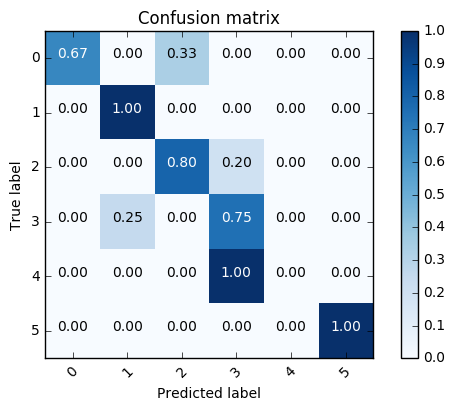

In [49]:
# Confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

labels = np.array([0,2,3,5,3,2,2,3,2,1,4,3,2,1,0,0,1])
pred   = np.array([0,3,3,5,3,2,2,1,2,1,3,3,2,1,0,2,1])

num_classes = 6



# cm = np.zeros([num_classes, num_classes])

# equal = np.sum(labels == pred)
# print(cm)

# for l,p in zip(labels, pred):
#     cm[l,p] += 1
#     print(l,p)
# print(cm)
# s = np.sum(cm, axis=1)
# print('s = ', s.reshape([len(s),1]))
# r = cm / s.reshape([len(s),1])
# print(r)

def confusion_matrix(labels, pred, num_classes):
    cm = np.zeros([num_classes, num_classes])
    for l,p in zip(labels, pred):
        cm[l,p] += 1
#         print(l,p)
#     print(cm)
    s = np.sum(cm, axis=1)
#     print('s = ', s.reshape([len(s),1]))
    r = cm / s.reshape([len(s),1])
#     print(r)
    return r
    
cm = confusion_matrix(labels, pred, num_classes)    

# Borrowed from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f" % cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(cm, classes=range(num_classes),
                      title='Confusion matrix')

(9, 32, 32, 3)
9
angle = -9
angle = -9
angle = -9
angle = -9
sigma = 1.0
sigma = 1.0


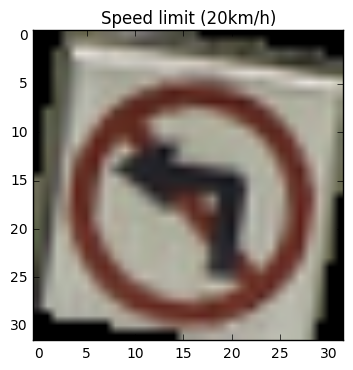

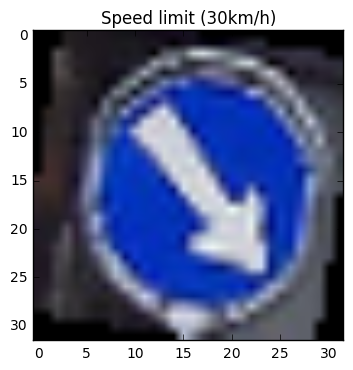

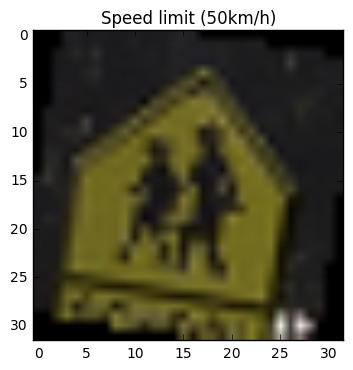

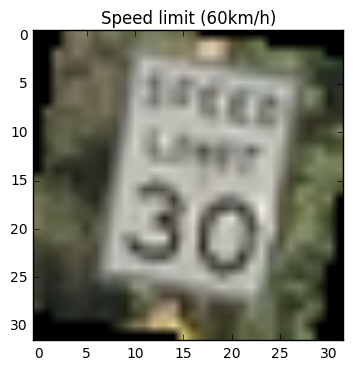

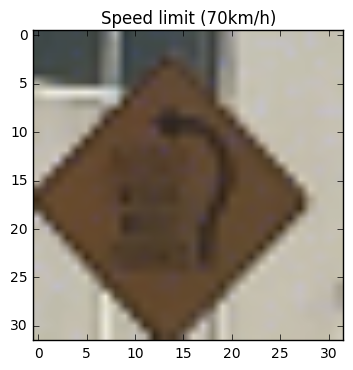

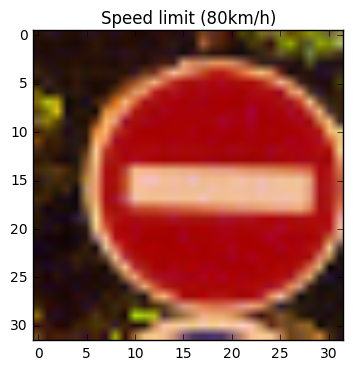

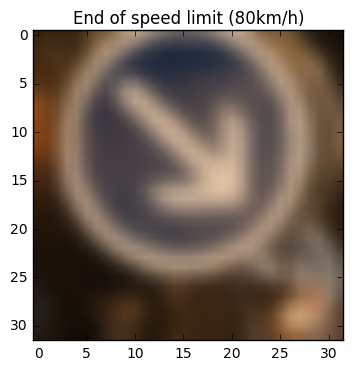

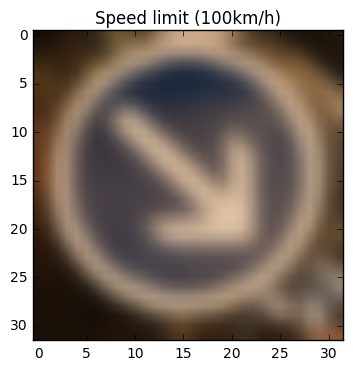

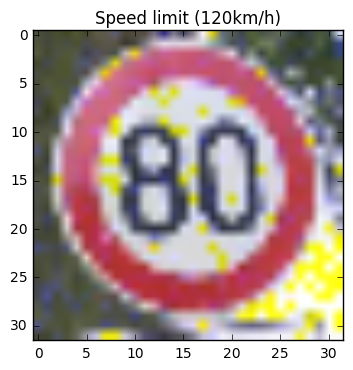

In [90]:
# Load New Test Images

import cv2
import os
from scipy import ndimage

def resize_image(img):
    return cv2.resize(img, (32,32))

def random_rotate(img):
#     angle = np.random.randint(-25, 25)
    angle = -9
    print('angle =', angle)
    return ndimage.rotate(img, angle, reshape=False)

def random_gaussian_filter(img):
    sigma = np.random.choice([0.2,0.5,0.7,1])
#     sigma = 0.5
    print('sigma =', sigma)
    return ndimage.gaussian_filter(img, sigma=sigma)

def random_noise(img):
    noise = np.zeros_like(img)
    noise_lvl = np.random.choice([10, 20, 30])
    cv2.randn(noise, 0, noise_lvl.flatten())
#     print("noise =", noise)
    return img + noise

def random_image_transform(img):
    transforms = {
        0: random_rotate,
        1: random_gaussian_filter,
        2: random_noise
    }
    n = np.random.randint(3)
    im = transforms[n](img)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    return im

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(resize_image(img))
    return np.array(images)




imgs = load_images_from_folder('test_imgs')
print(imgs.shape)


print(len(imgs))


for idx, im in enumerate(imgs):
    plt.figure()
#     im = random_gaussian_filter(im)
#     im = random_noise(im)
    im = random_image_transform(im)
    plt.imshow(im)
    plt.title(signnames[idx])

